In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# --- Read data ---
file_path = r'C:\Users\Adarshkumar\Documents\Naresh it\EDA\Pandas Assignment\loan_data.csv'
loan_df = pd.read_csv(file_path)

In [158]:
# --- Separate categorical and numerical columns ---
categorical = loan_df.select_dtypes(include = 'object').columns
numerical = loan_df.select_dtypes(exclude ='object').columns

In [159]:
print("Categorical Columns: ", categorical)
print("Numerical Columns:", numerical)

Categorical Columns:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical Columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [160]:
# --- Data quick checks ---
print("\n Shape : ",loan_df.shape)
print("\n Size : ",loan_df.size)
print("\n Columns : ",loan_df.columns)


 Shape :  (614, 13)

 Size :  7982

 Columns :  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [161]:
# -- Null value analysis (before imputation) --
print("\n Null value analysis before imputation :\n",loan_df.isnull().sum())


 Null value analysis before imputation :
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [162]:
import warnings
warnings.filterwarnings('ignore')
loan_df.fillna(method='pad')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [163]:
# -- # Fill numerical nulls with median --
for i in numerical:
    loan_median = loan_df[i].median()
    loan_df[i].fillna(loan_median,inplace=True)

print(loan_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [164]:
# -- # Fill categorical nulls with mode --
for i in categorical:
    loan_mode = loan_df[i].mode().values[0]
    loan_df[i].fillna(loan_mode,inplace=True)

print(loan_df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [165]:
for col in categorical:
    numeric_version = pd.to_numeric(loan_df[col], errors="coerce")
    numeric_ratio = numeric_version.notnull().mean()

In [166]:
for col in numerical:
    loan_df[col] = pd.to_numeric(loan_df[col], errors="coerce")
    loan_df[col].fillna(loan_df[col].median(), inplace=True)

In [167]:
# Drop id columns
rows = len(loan_df)
id_columns = [
    col for col in loan_df.columns
    if loan_df[col].nunique() / rows > 0.90
]

loan_df.drop(columns=id_columns, inplace=True)
print("Dropped ID-type columns:",id_columns)

Dropped ID-type columns: ['Loan_ID']


In [168]:
# Drop single value column
single_value_columns = [
    col for col in loan_df.columns
    if loan_df[col].nunique() == 1
]

loan_df.drop(columns=single_value_columns, inplace=True)

print(single_value_columns)

[]


In [169]:
print("Final shape\n",loan_df.shape)
print("Remaining columns",loan_df.columns.tolist())

Final shape
 (614, 12)
Remaining columns ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [170]:
categorical = loan_df.select_dtypes(include='object').columns.tolist()
numerical   = loan_df.select_dtypes(exclude=['object']).columns.tolist()

In [171]:
for i in categorical:
    print(loan_df[i].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


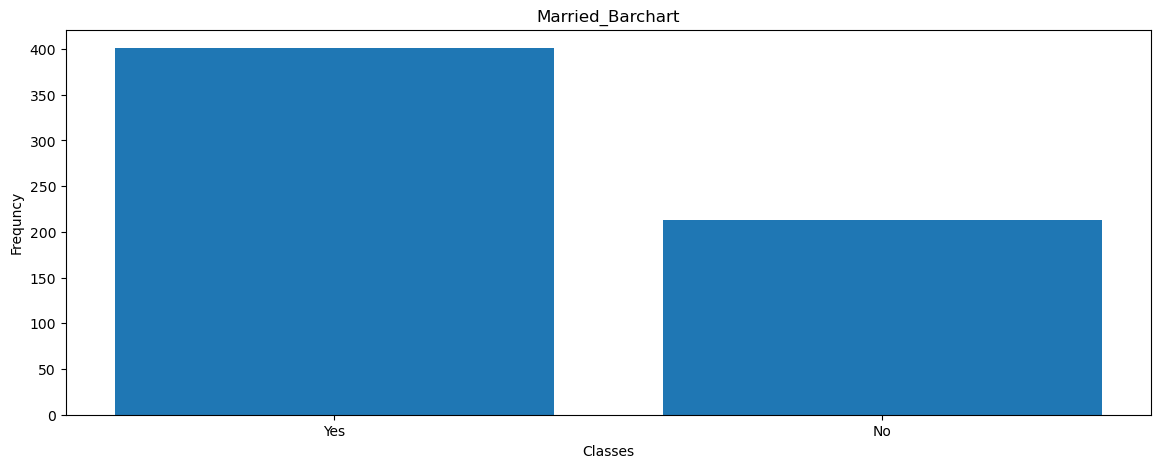

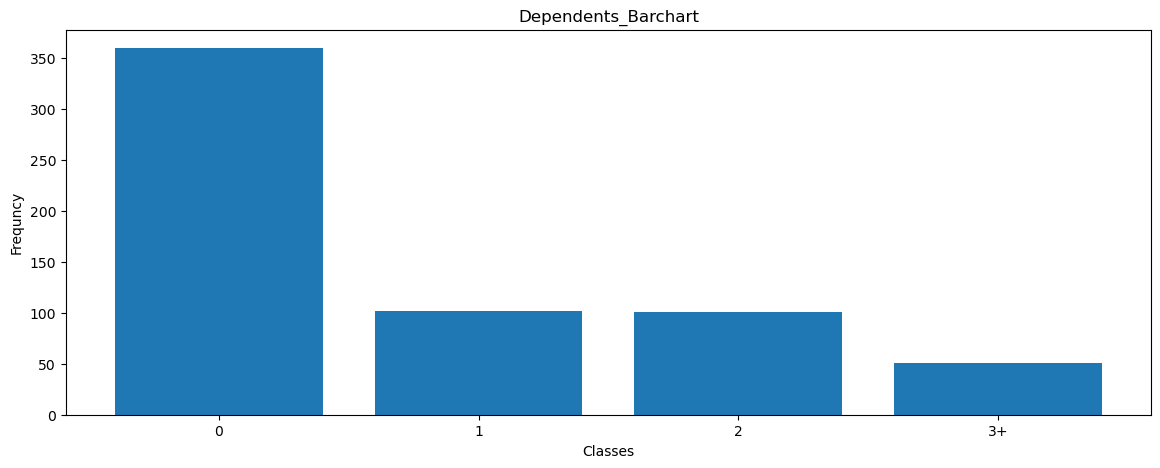

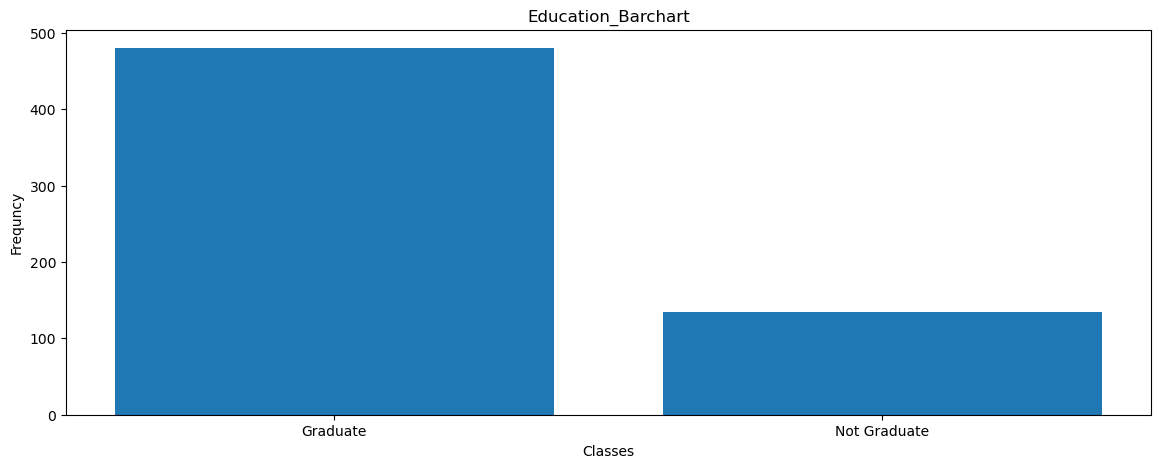

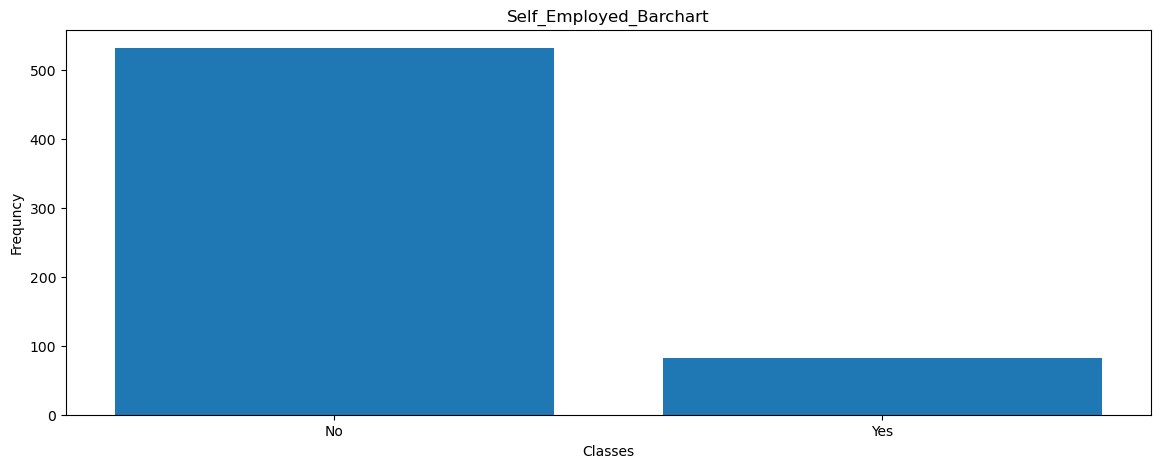

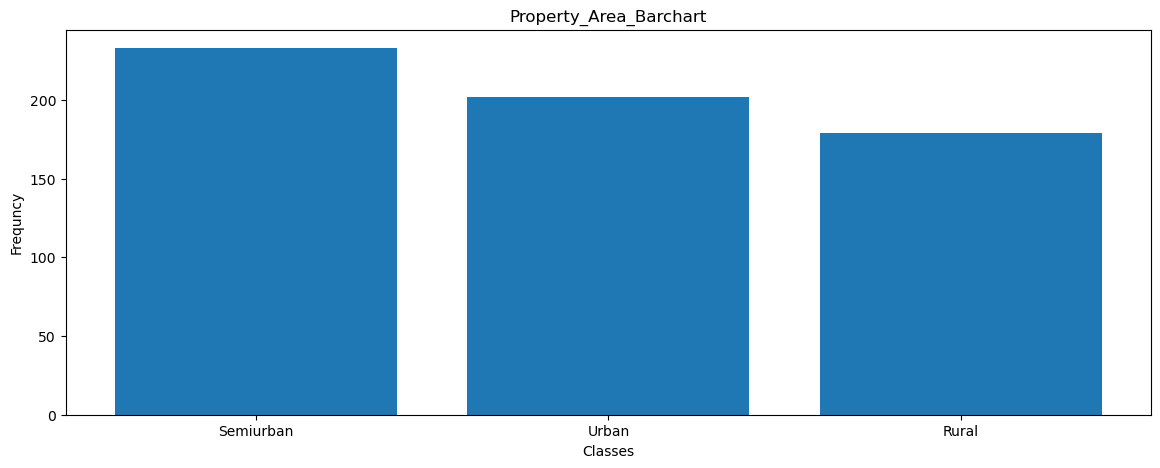

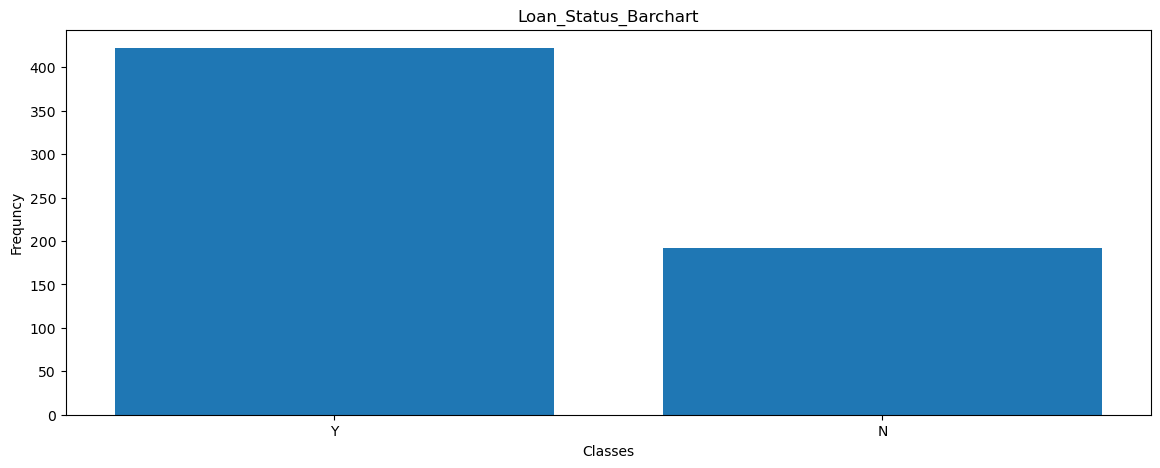

In [172]:

for i, j in enumerate(categorical[1:]):
    keys = loan_df[j].value_counts().keys()
    values = loan_df[j].value_counts().values
    plt.figure(figsize=(14,5))
    plt.bar(keys, values)

    plt.xlabel('Classes')
    plt.ylabel('Frequncy')
    plt.title(f'{j}_Barchart')
plt.show()

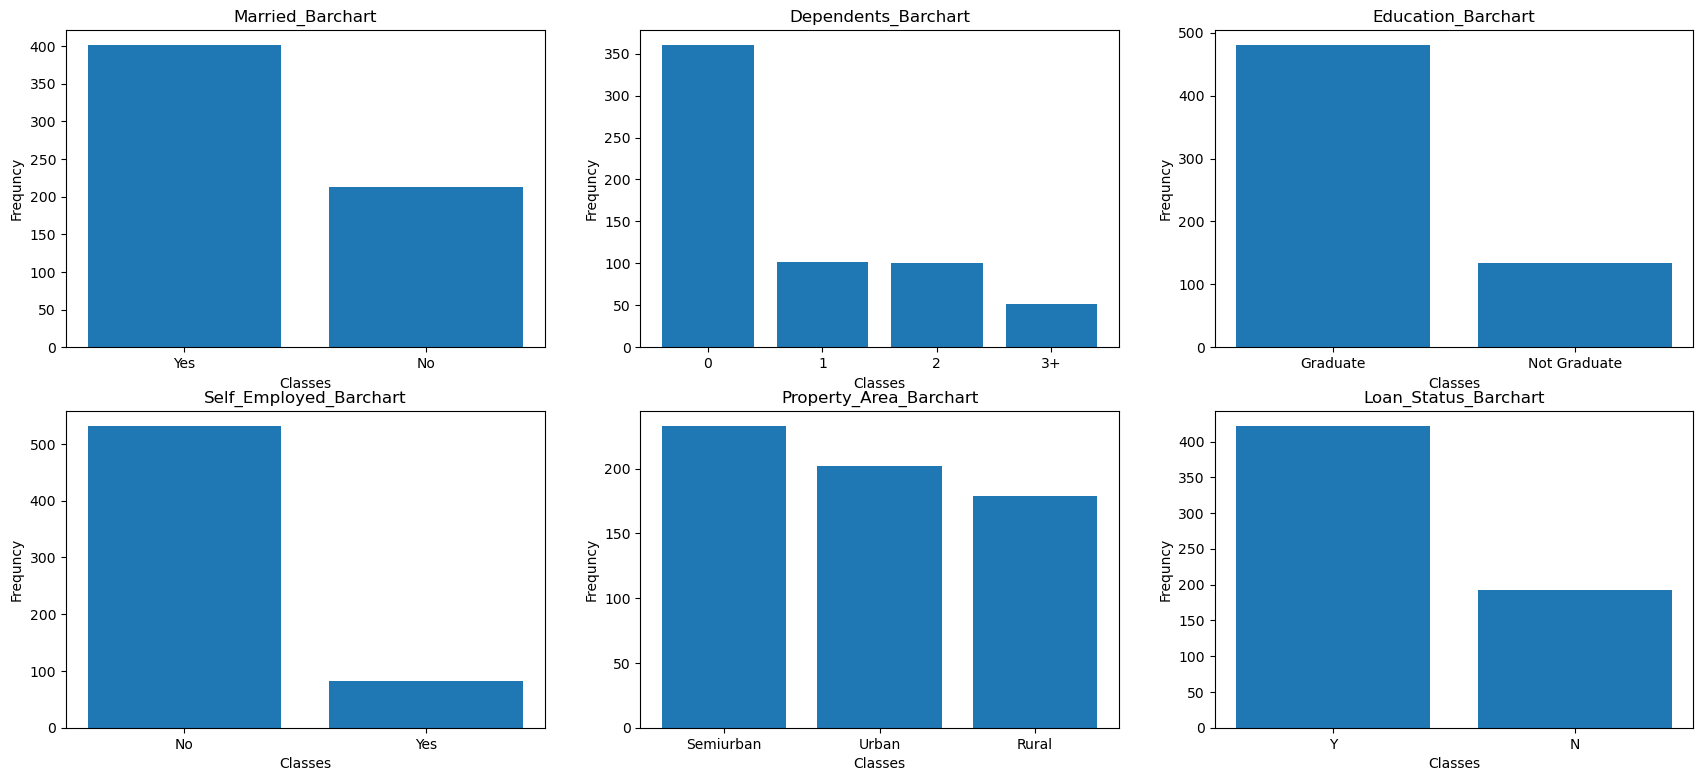

In [173]:
plt.figure(figsize=(21,14))

for i, j in enumerate(categorical[1:]):
    keys = loan_df[j].value_counts().keys()
    values = loan_df[j].value_counts().values
    plt.subplot(3,3,i+1)
    plt.bar(keys, values)

    plt.xlabel('Classes')
    plt.ylabel('Frequncy')
    plt.title(f'{j}_Barchart')
plt.show()

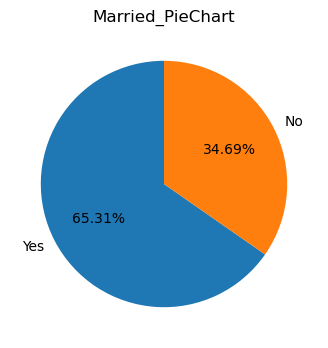

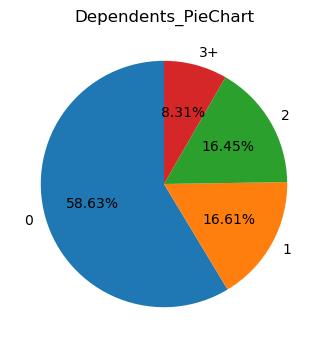

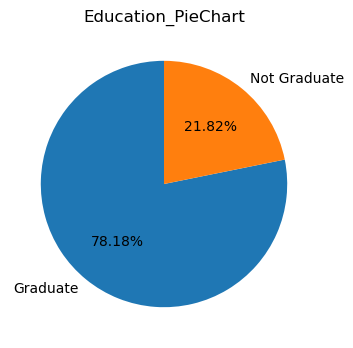

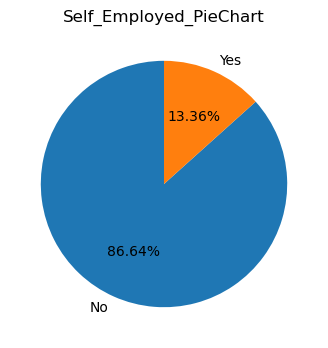

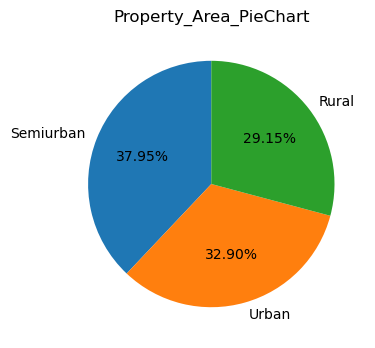

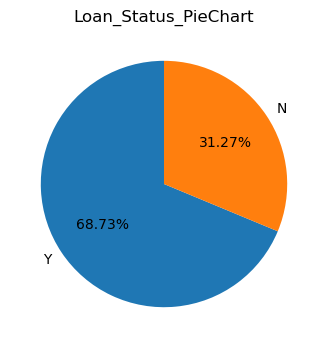

In [174]:
for i in categorical[1:]:
    counts = loan_df[i].value_counts()   
    plt.figure(figsize=(10,4))
    plt.pie(counts.values, autopct = '%1.2f%%',startangle = 90, labels = counts.index)
    plt.title(f'{i}_PieChart')
    plt.show()

# Numerical Column Analysis
- **Histogram**

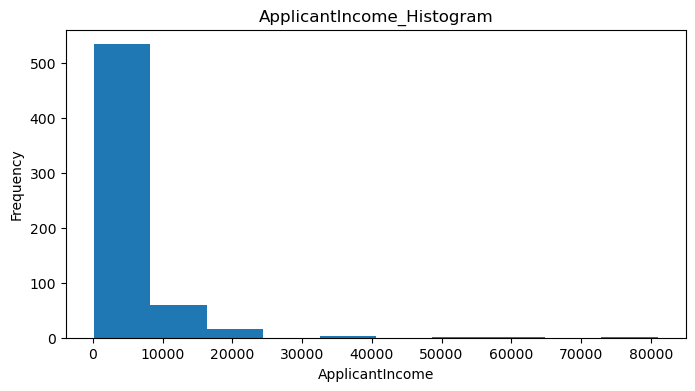

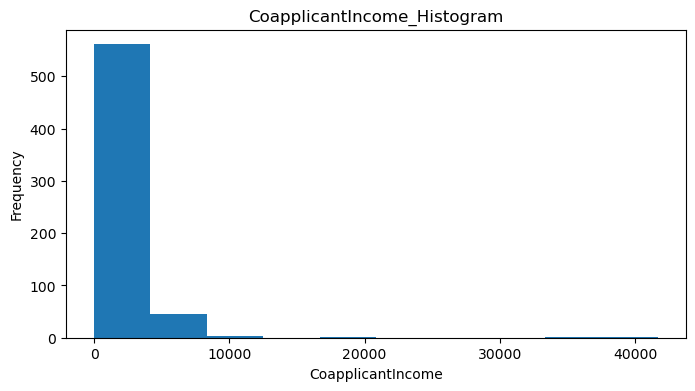

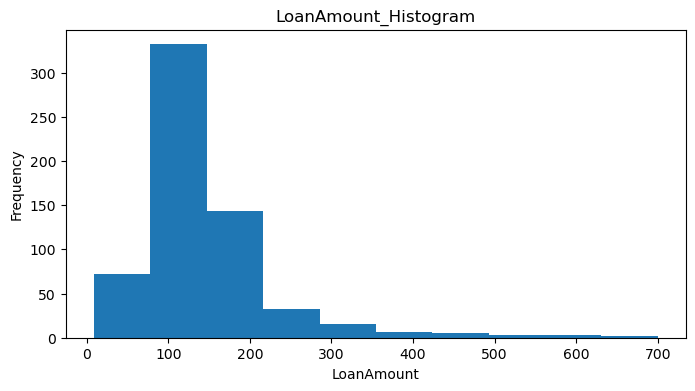

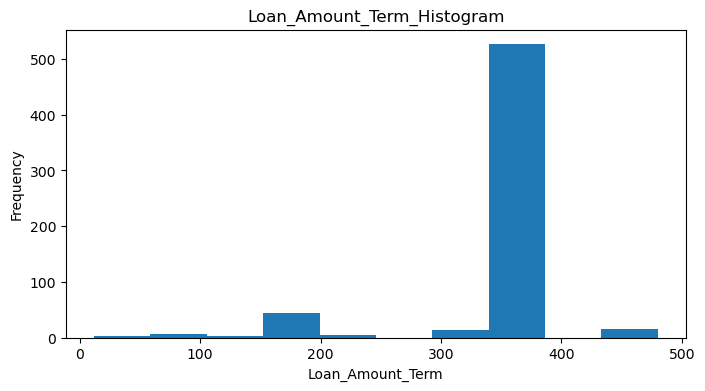

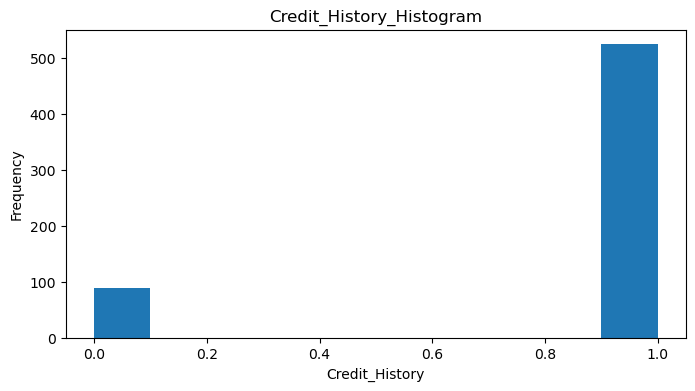

In [175]:
for i in numerical:
    plt.figure(figsize=(8,4))
    plt.hist(loan_df[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(f"{i}_Histogram")
    plt.show()

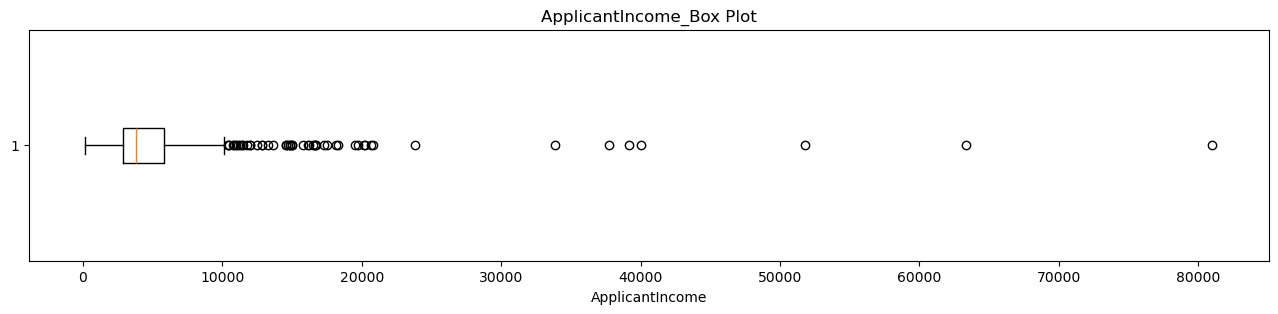

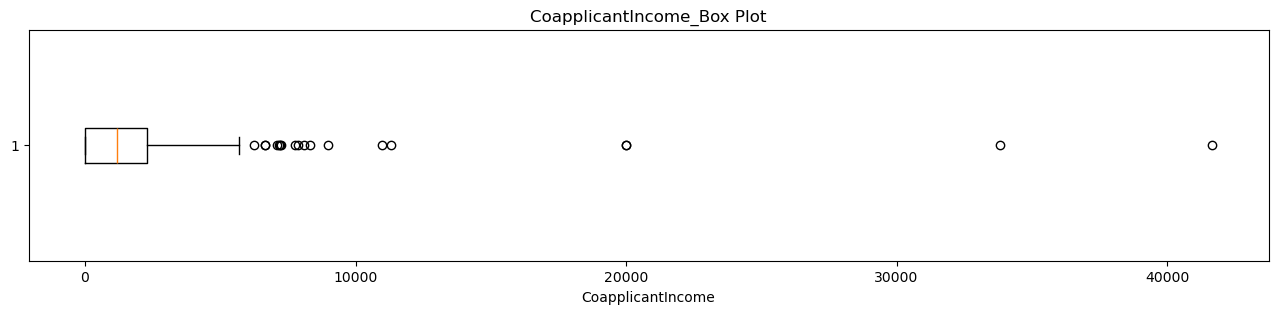

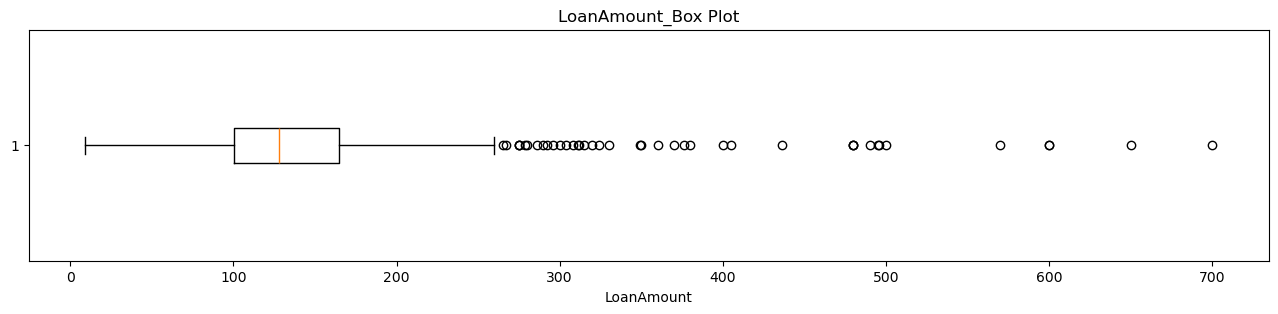

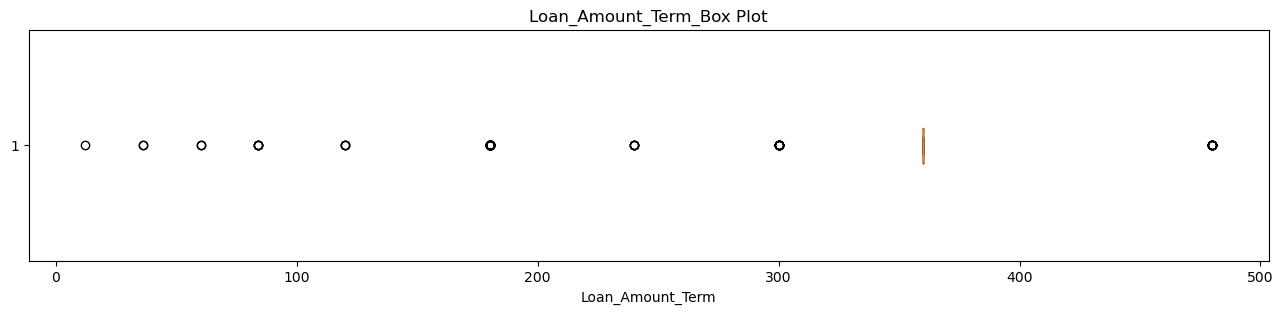

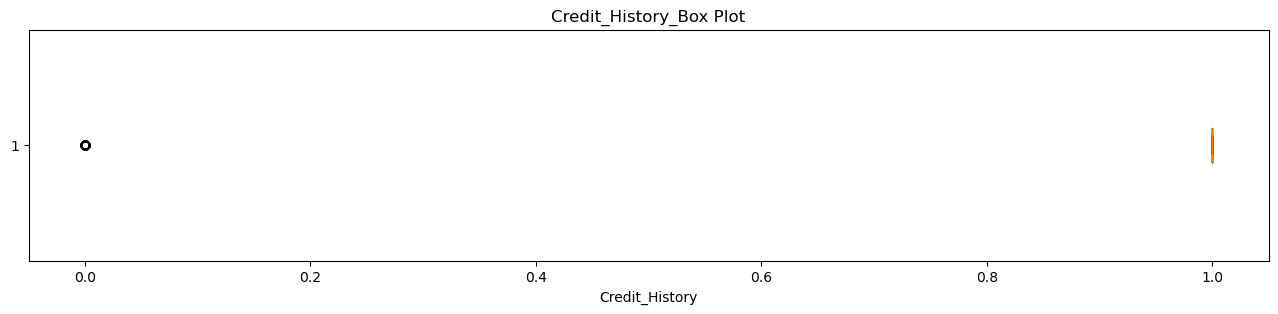

In [176]:
for i in numerical:
    plt.figure(figsize=(16,3))
    plt.boxplot(loan_df[i],vert = False)
    plt.xlabel(i)
    plt.title(f"{i}_Box Plot")
    plt.show()

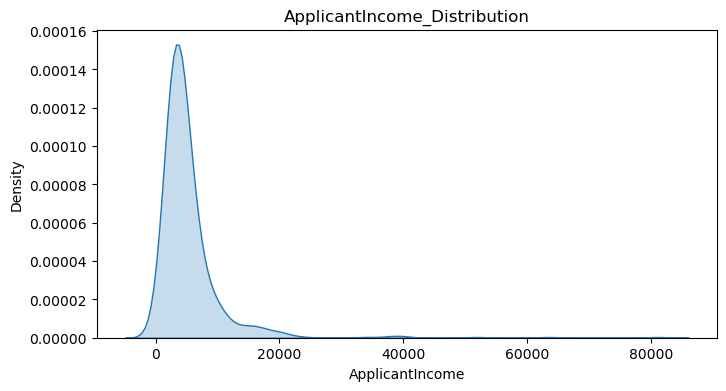

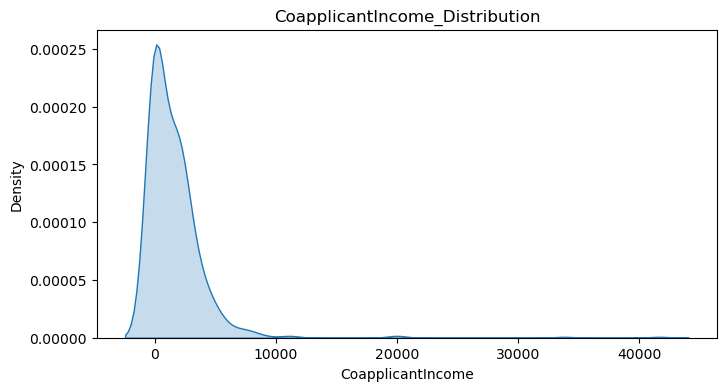

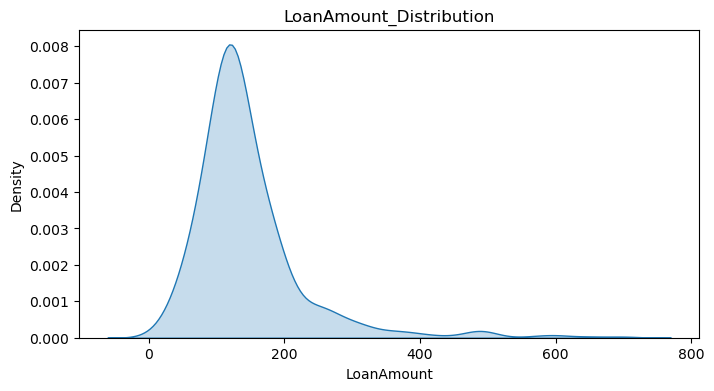

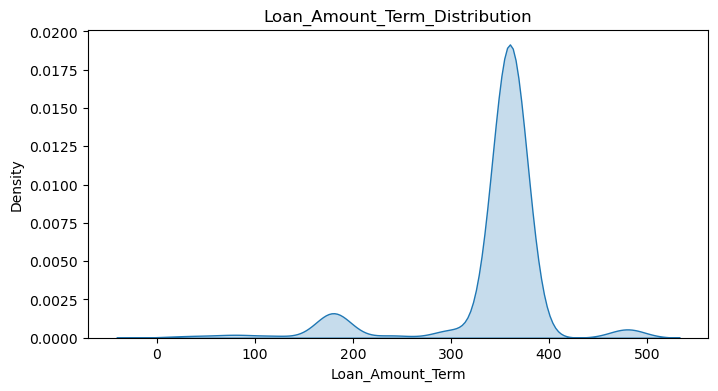

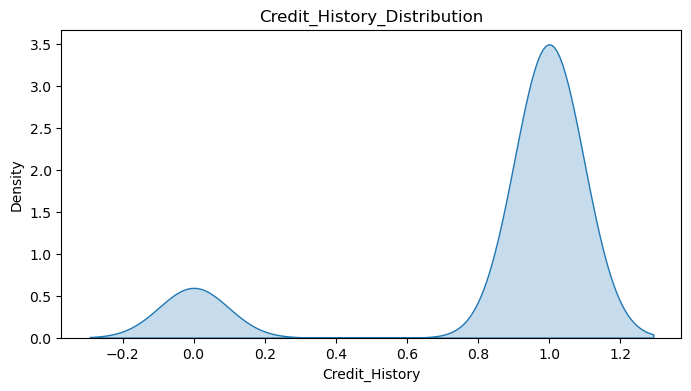

In [177]:
for i in numerical:
    plt.figure(figsize=(8,4))
    sns.kdeplot(loan_df[i], fill = True)
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.title(f"{i}_Distribution")
    plt.show()

In [178]:
loan_df_clean = loan_df.copy()
for i in numerical:
    series = loan_df_clean[i]
    q1 = np.quantile(series,0.25)
    q2 = np.quantile(series,0.50)
    q3 = np.quantile(series,0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    con1 = series > lower
    con2 = series > upper
    outliers = con1 | con2
    print(f"{i} : {outliers.sum()} Outliers detected")
    series[outliers] = q2
    loan_df_clean[i] = series

ApplicantIncome : 614 Outliers detected
CoapplicantIncome : 614 Outliers detected
LoanAmount : 614 Outliers detected
Loan_Amount_Term : 15 Outliers detected
Credit_History : 0 Outliers detected


In [179]:
loan_df_winso = loan_df.copy()
for i in numerical:
    series = loan_df_winso[i]
    q1 = np.percentile(series,25)
    q2 = np.percentile(series,50)
    q3 = np.percentile(series,75)
    IQR = q3-q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    series_clip = np.clip(series, lower, upper)
    loan_df_winso[i] = series

<Axes: >

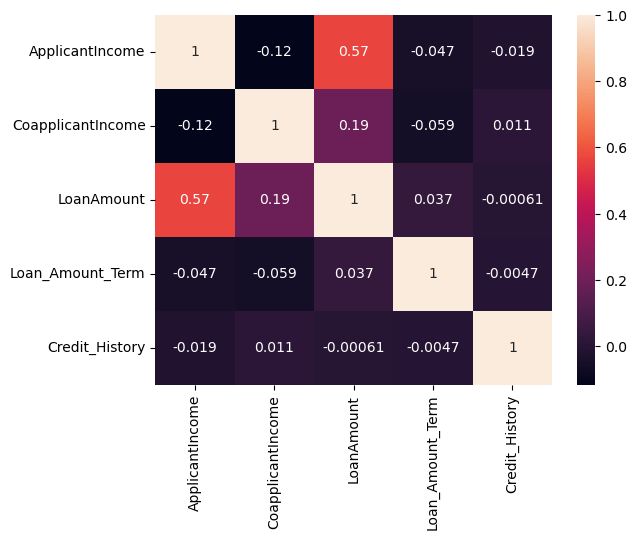

In [180]:
loan_df_corr = loan_df.corr(numeric_only = True)
sns.heatmap(loan_df_corr,annot = True)

In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical[1:]:
    loan_df[i] = le.fit_transform(loan_df[i])
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,Male,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,Male,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,Male,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,Male,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,Male,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,Male,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,Male,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [182]:
for i in categorical[1:]:
    pd.get_dummies(loan_df[i],dtype = int)
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,Male,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,Male,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,Male,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,Male,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,Male,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,Male,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,Male,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [189]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

loan_df_z = loan_df.copy()
loan_df_z[numerical] = ss.fit_transform(loan_df[numerical])

loan_df_z.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,applicant_ss,z_score
0,Male,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1,0.072991,0.072931
1,Male,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0,-0.134412,-0.134302
2,Male,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1,-0.393747,-0.393427
3,Male,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1,-0.462062,-0.461686
4,Male,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1,0.097728,0.097649


In [190]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

loan_df_norm = loan_df.copy()
loan_df_norm[numerical] = mm.fit_transform(loan_df[numerical])

loan_df_norm.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,applicant_ss,z_score
0,Male,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1,0.072991,0.072931
1,Male,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0,-0.134412,-0.134302
2,Male,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1,-0.393747,-0.393427
3,Male,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1,-0.462062,-0.461686
4,Male,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1,0.097728,0.097649
